# Fraud Detection using Machine Learning And Deep Learning

Importing the basic libraries

In [6]:
# import the necessary/basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

# Data Preprocessing

Reading the dataset into Dataframe.



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('creditcard.csv')
df2=df.copy()

Seeing the shape of dataset and the columns

In [10]:
print("Shape of the Dataset: ", df.shape) # number of rows and columns in our dataset
print("\n\n", df.columns) # columns/features in our Dataset

Shape of the Dataset:  (284807, 31)


 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Printing the first 5 rows of the data

In [11]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As expected the dataset does not contain any missing values.

Describing the dataset.

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here class 0 refers to Non-Fraud and class 1 refers to Fraud

In [14]:
# Determine number of fraud cases in Dataset

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = (len(Fraud)/float(len(Valid)))
print("Outlier_fraction: {0} %".format(outlier_fraction*100))

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Outlier_fraction: 0.17304750013189596 %
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
#Let's check data unbalance with respect with target value, i.e. Class


In [15]:
#Note: The histogram plot is not coming in Jupyter Notebook but it is there in collab one.
import plotly.graph_objs as go
from plotly.offline import iplot
temp = df["Class"].value_counts()
data_frame = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = data_frame['Class'],y = data_frame['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=data_frame['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [ ]:
df = df.fillna(method='ffill')


This gives a visual representation of the class imbalance. The below plot after PCA gives a better visualization of the imbalnce in the datasets.

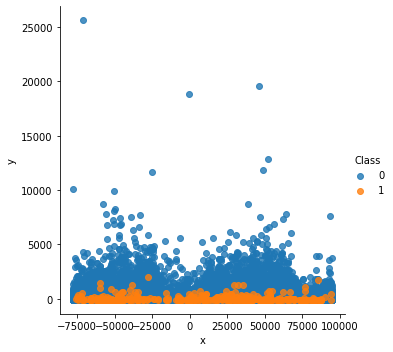

In [16]:
#Before sampling (PCA is performed for visualization only)
pca= PCA(n_components=2)
creditcard_2d= pd.DataFrame(pca.fit_transform(df.iloc[:,0:30]))
creditcard_2d= pd.concat([creditcard_2d, df['Class']], axis=1)
creditcard_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=creditcard_2d, fit_reg=False, hue='Class')

In [17]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

So we see that our data is highly imbalanced so further we will use some techniques to balance it 

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.
Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

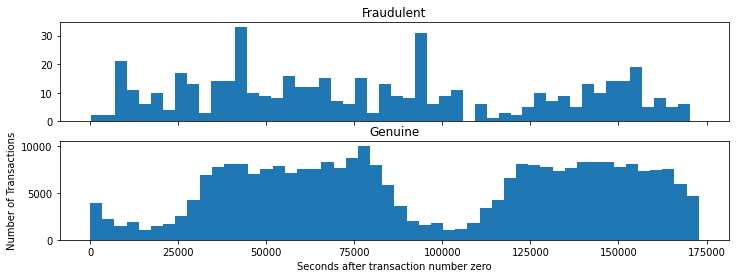

In [19]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(df["Time"][df["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(df["Time"][df["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

The transactions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transaction was initiated is not given. Thus, we'll drop this feature.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



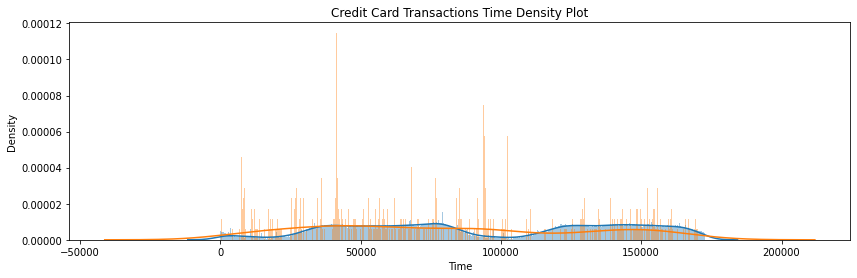

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]
plt.figure(figsize = (14,4))
plt.title('Credit Card Transactions Time Density Plot')
sns.set_color_codes("pastel")
sns.distplot(class_0,kde=True,bins=480)
sns.distplot(class_1,kde=True,bins=480)
plt.show()
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')


Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone

Distribuition of class with Transactions amount

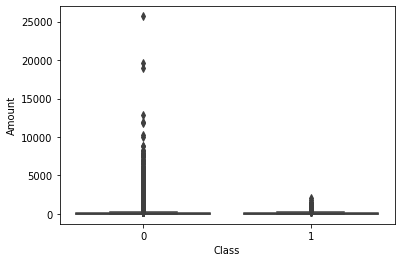

In [21]:
#Boxplot for the Amount feature, in order to visualiza the outliers.
sns.boxplot(x=df['Class'], y=df['Amount'])

Amount needs to be scaled. As if a feature has a variance orders of magnitude larger than the rest of the features, then it might dominate and, make the estimator unable to learn from other features as expected.

The same is evident from below box plot

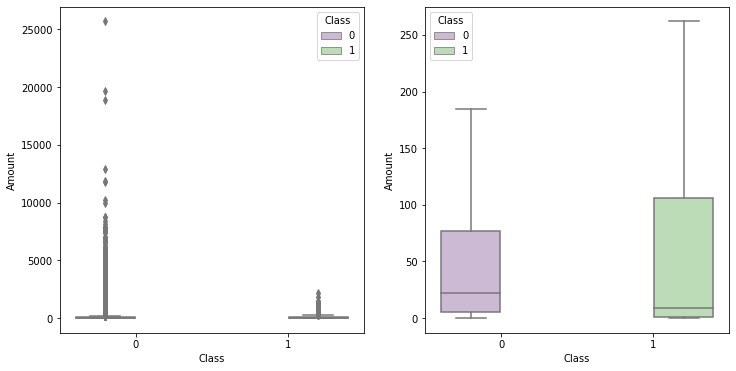

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [23]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

Seeing if there is any Similarity in Transactions

In [90]:
from scipy import spatial
sample_data = df.head(284800) 
samples = df.loc[284801:284807]

In [92]:
frame = []
for i in range(284801, 284807): 
    t1 = samples.loc[i]
    cls = samples.loc[i]["Class"]
    for j in range(284800):
        t2 = sample_data.loc[j]
        class_label = sample_data.loc[j]["Class"]
        similarity = 1 - spatial.distance.cosine(t1, t2)
        if (class_label == 1):
            frame.append([class_label, similarity, j])
        
    d_f = pd.DataFrame(frame, columns=['Class', 'Similarity', 'Transaction ID'])
    df_sorted = d_f.sort_values("Similarity", ascending=False)
    print("Top 5 suspected-fraud transactions having highest similarity with transaction ID = "+str(i)+ ":")
    print(df_sorted.iloc[:5])
    print("\n")
    frame = []

Top 5 suspected-fraud transactions having highest similarity with transaction ID = 284801:
     Class  Similarity  Transaction ID
404    1.0         1.0          219025
476    1.0         1.0          263080
447    1.0         1.0          245347
399    1.0         1.0          214775
410    1.0         1.0          222419


Top 5 suspected-fraud transactions having highest similarity with transaction ID = 284802:
     Class  Similarity  Transaction ID
399    1.0         1.0          214775
404    1.0         1.0          219025
476    1.0         1.0          263080
452    1.0         1.0          248971
410    1.0         1.0          222419


Top 5 suspected-fraud transactions having highest similarity with transaction ID = 284803:
     Class  Similarity  Transaction ID
485    1.0         1.0          276071
434    1.0         1.0          238466
396    1.0         1.0          213092
194    1.0         1.0           79874
157    1.0         1.0           57248


Top 5 suspected-fra

# Features correlation

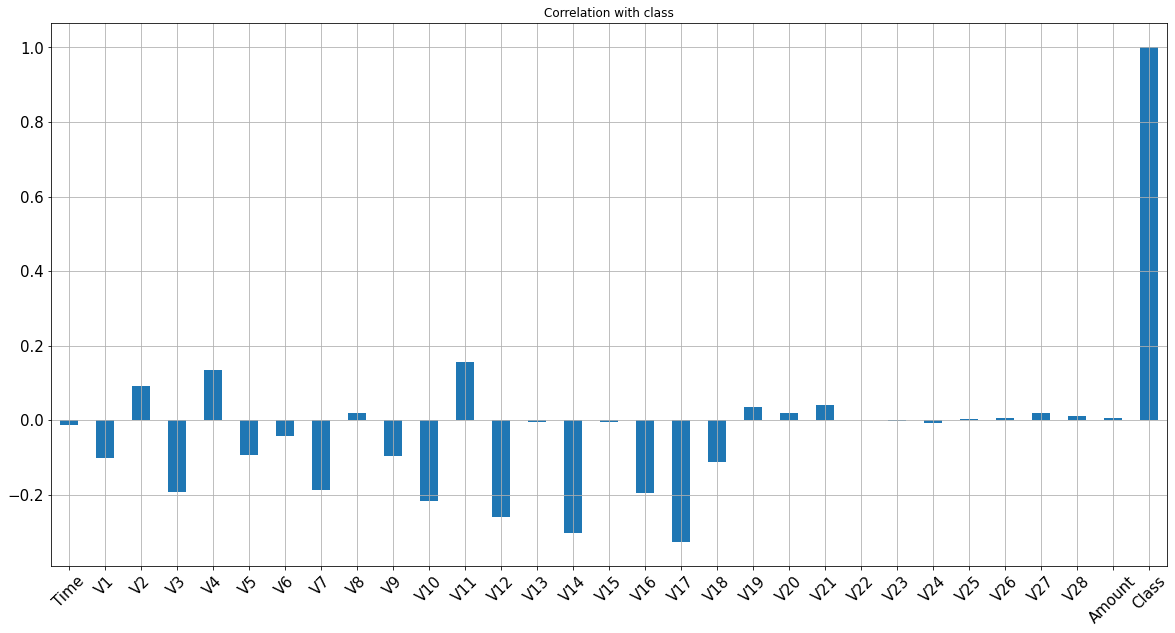

In [26]:
df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

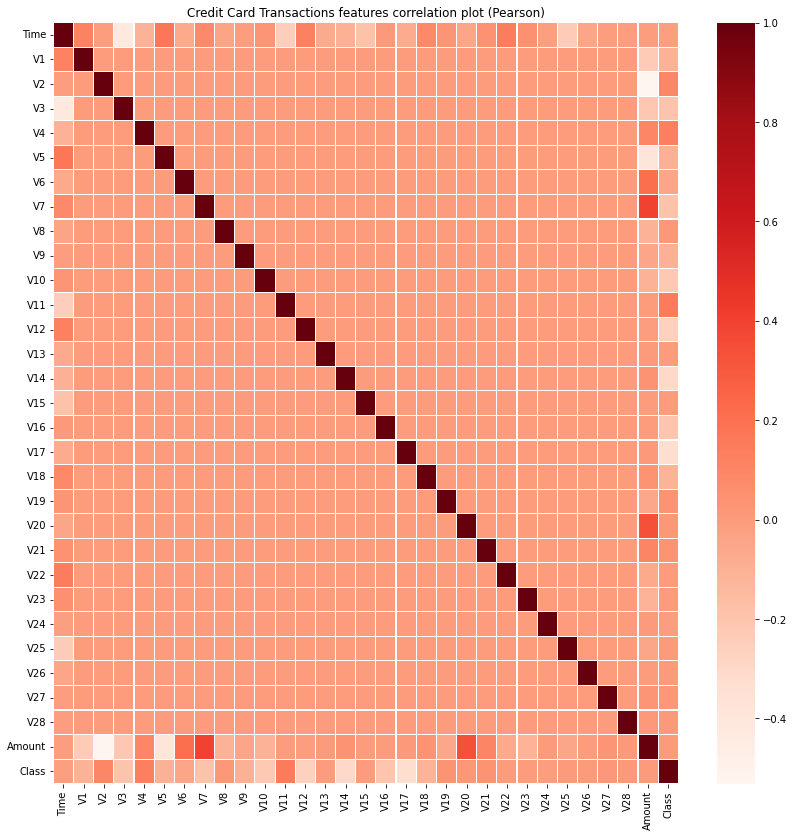

In [27]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df2.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

 Seeing the Features density plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parame

<Figure size 432x288 with 0 Axes>

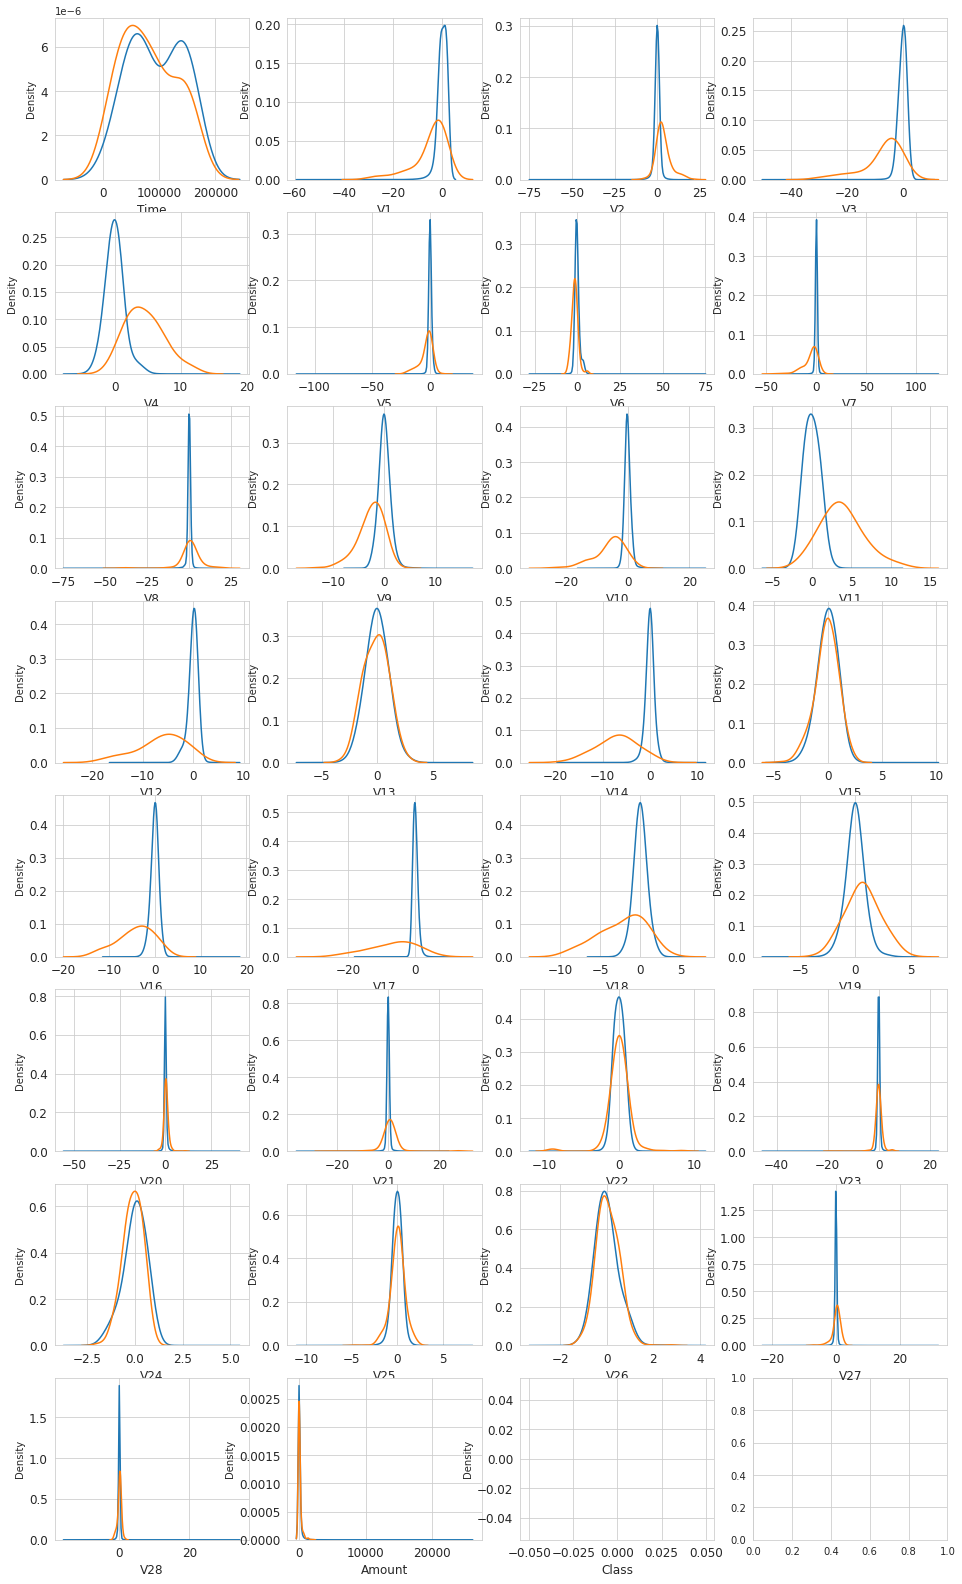

In [99]:
#Note: Move forward through the warnings to see the plot
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

So it is quite evident that our data needs to be scaled so scaling it using a Standard Scalar from Scikit Learn

### Scaling

STANDARDSCALAR is applied ON TIME AND AMOUNT and not applied on others as  All other 'V' columns are already scaled as they've undergone PCA transformation

In [28]:
from sklearn.preprocessing import StandardScaler
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

# Define predictors and target values

As from above we had seen that time is not a good feauture and also if used it would have high dependence on predicting the classifiers so dropping it.


In [29]:
target = 'Class'
predictors = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [30]:
X = df[predictors]
y = df[target]

# Split data in train and test set

Here we have used "STRATIFY" to ensure that sample of fraud labels are in the test set.
Also stratify split is used when there is misclassified data 

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(213605, 29) (71202, 29) (213605,) (71202,)


In [32]:
y_train.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [33]:
y_test.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

# Building the models and seeing results

We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each models performance.

Function for confusion matrix

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix")
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#Linear Regression:

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train, y_train)

# Predicting Test Set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, np.round(abs(y_pred)), normalize=False) 
prec = precision_score(y_test, np.round(abs(y_pred)))
rec = recall_score(y_test, np.round(abs(y_pred)))
f1 = f1_score(y_test, np.round(abs(y_pred)))


results = pd.DataFrame([['Linear Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [36]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,71137,0.914286,0.520325,0.663212


[[71073     6]
 [   59    64]]
Confusion matrix


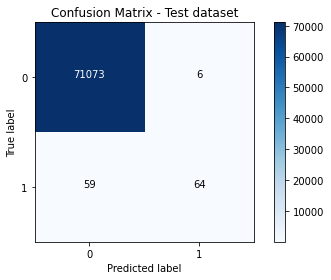

In [37]:
import itertools
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Linear Regression Model, we have:

71073 transactions classified as normal and were actually normal;

6 transactions classified as fraud but that were really normal

59 transactions classified as normal but which were fraud

64 transactions classified as fraud and were actually fraud.

#Logistic Regression:

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

# Predicting Test Set
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [39]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.999326,0.886598,0.699187,0.781818


[[71068    11]
 [   37    86]]
Confusion matrix


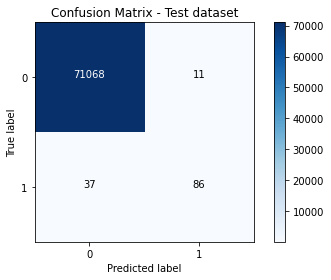

In [40]:
import itertools
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Logistic Regression Model, we have:

71068 transactions classified as normal and were actually normal;

11 transactions classified as fraud but that were really normal

37 transactions classified as normal but which were fraud

86 transactions classified as fraud and were actually fraud.

#Decision Tree Model

In [41]:
## Decison Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train, y_train)

          

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [42]:

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.999185,0.733813,0.829268,0.778626


[[71042    37]
 [   21   102]]
Confusion matrix


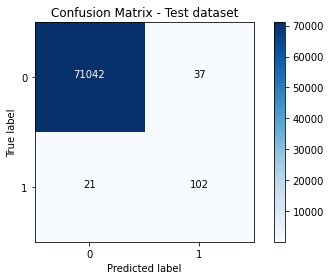

In [43]:
import itertools
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Decision Tree Model, we have:

71042 transactions classified as normal and were actually normal;

37 transactions classified as fraud but that were really normal

21 transactions classified as normal but which were fraud

102 transactions classified as fraud and were actually fraud.

#Random forest model

In [44]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results
#results = results.append(model_results, ignore_index = True)

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=100),0.999677,0.946429,0.861789,0.902128


In [45]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.999185,0.733813,0.829268,0.778626


[[71073     6]
 [   17   106]]
Confusion matrix


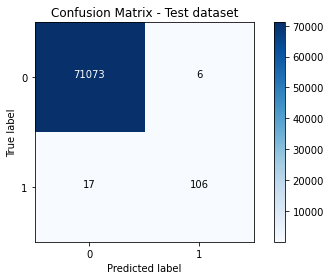

In [46]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Random Forest Model, we have:

71073 transactions classified as normal and were actually normal;

6 transactions classified as fraud but that were really normal

17 transactions classified as normal but which were fraud

106 transactions classified as fraud and were actually fraud.

#SVM Model 

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

classifier= SVC(C= 10, kernel= 'rbf', random_state= 0)
classifier.fit(X_train, np.array(y_train).ravel())

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("The accuracy is "+str((cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1]+cm[1,0] + cm[1,1])*100) + " %")
print("The recall is "+ str(cm[1,1]/(cm[1,0] + cm[1,1])*100) +" %")
print("The precision is "+ str(cm[1,1]/(cm[0,1] + cm[1,1])*100) +" %")

cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

The accuracy is 99.9592708069998 %
The recall is 81.30081300813008 %
The precision is 94.33962264150944 %


,predicted fraud,predicted normal
is Fraud,100,23
is Normal,6,71073


Here these above results are somewhat not meaningful according to my understanding as the Non-Fraud transactions are far far greater then the Fraud Transactions in the dataset
As we know Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model. Initially, a method should be applied to balance the data before taking into account any performance evaluation metrics.

# Undersampling

Now we will evaluate the model on the undersampled data

In [69]:
df2['Time'] = StandardScaler().fit_transform(df2['Time'].values.reshape(-1,1))
df2['Amount'] = StandardScaler().fit_transform(df2['Amount'].values.reshape(-1, 1))

In [70]:
#dropping Time because it does not give any valuable information
df2 = df2.drop("Time", axis = 1)

In [71]:
fraud_ind = np.array(df2[df2.Class == 1].index)
num_frauds = len(fraud_ind)
print(num_frauds)
normal_ind = np.array(df2[df2.Class == 0].index)
num_normal = len(normal_ind)
print(num_normal)

492
284315


In [72]:
normal_ind = df2[df2.Class == 0].index
random_normal_ind = np.random.choice(normal_ind, num_frauds, replace = False)
random_normal_ind = np.array(random_normal_ind)

In [73]:
under_sample_ind = np.concatenate( [fraud_ind, random_normal_ind])

In [74]:
print(len(under_sample_ind))

984


In [75]:
under_sample_data = df2.iloc[under_sample_ind, :]

In [76]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(688, 29)
(296, 29)
(688, 1)
(296, 1)


Above, we randomly selected the same amount of non-frauds as the fraud and created a new dataset. With the down-sized data, we re-train the models and check the performances 

#Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train, y_train)

# Predicting Test Set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, np.round(abs(y_pred)), normalize=False) 
prec = precision_score(y_test, np.round(abs(y_pred)),average='micro')
rec = recall_score(y_test, np.round(abs(y_pred)),average='micro')
f1 = f1_score(y_test, np.round(abs(y_pred)),average='micro')


results = pd.DataFrame([['Linear Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [80]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,263,0.888514,0.888514,0.888514


#Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

# Predicting Test Set
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [82]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.912162,0.917808,0.905405,0.911565


[[136  12]
 [ 14 134]]
Confusion matrix


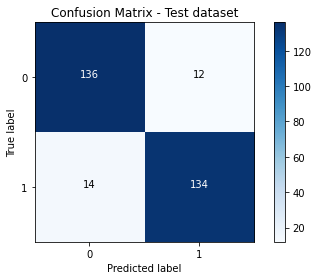

In [83]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Logistic Regression Model, we have:

139 transactions classified as normal and were actually normal;

6 transactions classified as fraud but that were really normal

18 transactions classified as normal but which were fraud

133 transactions classified as fraud and were actually fraud.

#Decision Tree Model

In [84]:
## Decison Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train, y_train)

          

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [85]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.885135,0.87013,0.905405,0.887417


[[128  20]
 [ 14 134]]
Confusion matrix


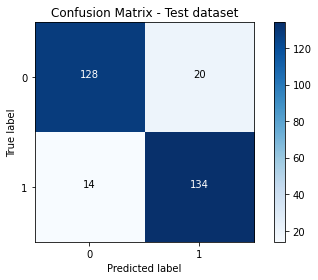

In [86]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Decision Tree Model, we have:

133 transactions classified as normal and were actually normal;

12 transactions classified as fraud but that were really normal

23 transactions classified as normal but which were fraud

128 transactions classified as fraud and were actually fraud.

#Random Forest Model

In [87]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [88]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.885135,0.87013,0.905405,0.887417
1,Random Forest (n=100),0.915541,0.93617,0.891892,0.913495


[[139   9]
 [ 16 132]]
Confusion matrix


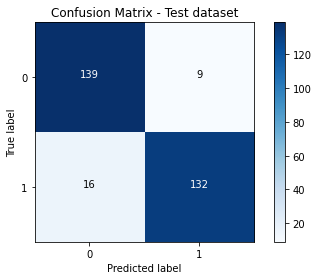

In [89]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Random Forest Model, we have:

144 transactions classified as normal and were actually normal;

1 transactions classified as fraud but that were really normal

19 transactions classified as normal but which were fraud

132 transactions classified as fraud and were actually fraud.

#SVM Model with undersampling

In [93]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

classifier= SVC(C= 10, kernel= 'rbf', random_state= 0)
classifier.fit(X_train, np.array(y_train).ravel())

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("The accuracy is "+str((cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1]+cm[1,0] + cm[1,1])*100) + " %")
print("The recall is "+ str(cm[1,1]/(cm[1,0] + cm[1,1])*100) +" %")
print("The precision is "+ str(cm[1,1]/(cm[0,1] + cm[1,1])*100) +" %")

cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

The accuracy is 90.87837837837837 %
The recall is 88.51351351351352 %
The precision is 92.90780141843972 %


,predicted fraud,predicted normal
is Fraud,131,17
is Normal,10,138


# Neural Network model results in Undersampling case.

In [94]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np



x_orjinal_train , x_orjinal_test, y_orjinal_train, y_orjinal_test = train_test_split(X_undersample, y_undersample, test_size=0.33,random_state=21)

y_train = y_orjinal_train
y_test = y_orjinal_test

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_orjinal_train)
x_train = pd.DataFrame(x_scaled)
x_scaled1 = min_max_scaler.fit_transform(x_orjinal_test)
x_test = pd.DataFrame(x_scaled1)


x_train = x_train.values
x_test = x_test.values

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

print(x_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

(659, 29)


In [95]:
x_train.shape

(659, 29, 1)

In [96]:
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

cnn = Sequential()
cnn.add(Conv1D(32, 2, activation='relu', input_shape=(29,1)))
cnn.add(Dropout(0.1))

cnn.add(Conv1D(64, 2, activation='relu'))
cnn.add(Dropout(0.2))


cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

epochs = 20
batch_size = 10

history = cnn.fit(x_train , y_train , verbose=1 , batch_size=batch_size , epochs=epochs ,validation_split=0.2 )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 28, 32)            96        
                                                                 
 dropout_4 (Dropout)         (None, 28, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 27, 64)            4160      
                                                                 
 dropout_5 (Dropout)         (None, 27, 64)            0         
                                                                 
 flatten_1 (Flatten)         (None, 1728)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1728)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

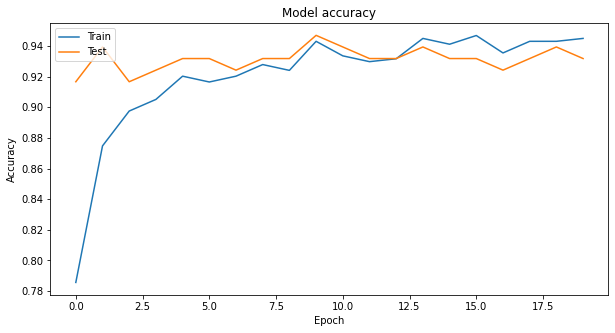

In [97]:
fig, ax1 = plt.subplots(figsize= (10, 5) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[[160   6]
 [ 19 140]]
Confusion matrix


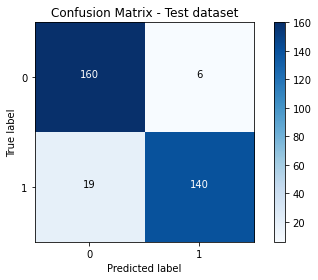

In [98]:
y_pred=cnn.predict(x_test)
cm = confusion_matrix(y_test, y_pred.round())

print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Neural Network Model, we have:

163 transactions classified as normal and were actually normal;

3 transactions classified as fraud but that were really normal

24 transactions classified as normal but which were fraud

135 transactions classified as fraud and were actually fraud.

So we here can say that our results are meaningful as it was calculated on balanced data.

Also we observe that we obtain fairly good results although accuracy fell down but other criterion increased

Accuracy has decreased, but sensitivity has greatly increased. Looking at the confusion matrix, we can see a much higher percentage of correct classifications of fraudulent data.

Unfortunately, a greater number of fraud classifications almost always means a correspondingly greater number of valid transactions also classified as fraudulent.

# Oversampling the data

As noted earlier, the dataset is unbalanced. Training unbalanced dataset with learning algorithms may lead to misclassification of minority class. Therefore, to compensate for the unbalancedness, I used ADASYN oversampling method as implemented in imbalanced-learn package to resample the dataset.
ADASYN (ADAptive SYNthetic) is an oversampling technique that adaptively generates minority data samples according to their distributions using K nearest neighbor.

In [48]:
from imblearn.over_sampling import ADASYN 
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [49]:
df = pd.read_csv('creditcard.csv')
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [50]:
# apply the ADASYN over-sampling
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y)))
X_res, y_res = ada.fit_sample(scaled_X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Resampled dataset shape Counter({0: 284315, 1: 284313})


Splitting the data

In [51]:
# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

#Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train, y_train)

# Predicting Test Set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, np.round(abs(y_pred)), normalize=False) 
prec = precision_score(y_test, np.round(abs(y_pred)),average='micro')
rec = recall_score(y_test, np.round(abs(y_pred)),average='micro')
f1 = f1_score(y_test, np.round(abs(y_pred)),average='micro')


results = pd.DataFrame([['Linear Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [53]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,156924,0.836268,0.836268,0.836268


[[    0     0     0     0     0     0]
 [   20 84431  9327    31     1     2]
 [    0 19349 72493  1993     1     0]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]]
Confusion matrix


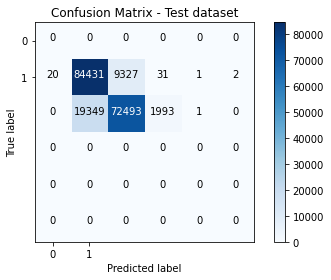

In [54]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Linear Regression Model, we have:

84431 transactions classified as normal and were actually normal;

9327 transactions classified as fraud but that were really normal

19349 transactions classified as normal but which were fraud

72493 transactions classified as fraud and were actually fraud.

#Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

# Predicting Test Set
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [56]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.88787,0.903167,0.868931,0.885718


[[85070  8742]
 [12299 81537]]
Confusion matrix


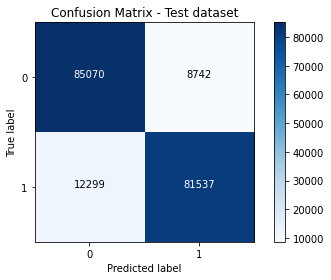

In [57]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Logistic Regression Model, we have:

85070 transactions classified as normal and were actually normal;

8742 transactions classified as fraud but that were really normal

12299 transactions classified as normal but which were fraud

81537 transactions classified as fraud and were actually fraud.

#Decision Tree model

In [58]:
## Decison Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train, y_train)

          

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.99855,0.997702,0.999403,0.998552


[[93596   216]
 [   56 93780]]
Confusion matrix


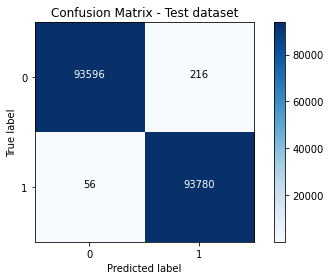

In [59]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Decision Tree Model, we have:

93596 transactions classified as normal and were actually normal;

216 transactions classified as fraud but that were really normal

56 transactions classified as normal but which were fraud

93780 transactions classified as fraud and were actually fraud.

#Random Forest Model

In [60]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [61]:


results


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.998550,0.997702,0.999403,0.998552
1,Random Forest (n=100),0.999877,0.999755,1.000000,0.999877


[[93789    23]
 [    0 93836]]
Confusion matrix


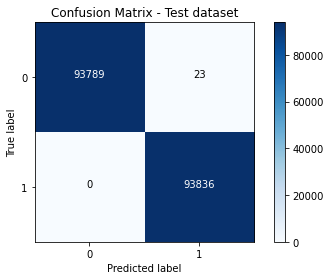

In [62]:

cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

With the Random Forest Model, we have:

93789 transactions classified as normal and were actually normal;

23 transactions classified as fraud but that were really normal

0 transactions classified as normal but which were fraud

93836 transactions classified as fraud and were actually fraud.

# Neural Network model in over sampling case.

In [63]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np



x_orjinal_train , x_orjinal_test, y_orjinal_train, y_orjinal_test = train_test_split(X_res, y_res, test_size=0.33,random_state=21)

y_train = y_orjinal_train
y_test = y_orjinal_test

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_orjinal_train)
x_train = pd.DataFrame(x_scaled)
x_scaled1 = min_max_scaler.fit_transform(x_orjinal_test)
x_test = pd.DataFrame(x_scaled1)


x_train = x_train.values
x_test = x_test.values

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

print(x_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

(380980, 30)


In [64]:
x_train.shape

(380980, 30, 1)

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

cnn = Sequential()
cnn.add(Conv1D(32, 2, activation='relu', input_shape=(30,1)))
cnn.add(Dropout(0.1))

cnn.add(Conv1D(64, 2, activation='relu'))
cnn.add(Dropout(0.2))


cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

epochs = 5
batch_size = 64
#history = cnn.fit(x_train , y_train , verbose=1 , batch_size=batch_size , epochs=epochs ,validation_data=(x_test, y_test) )
history = cnn.fit(x_train , y_train , verbose=1 , batch_size=batch_size , epochs=epochs ,validation_split=0.2 )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1792)              0         
                                                                 
 dense (Dense)               (None, 64)                1

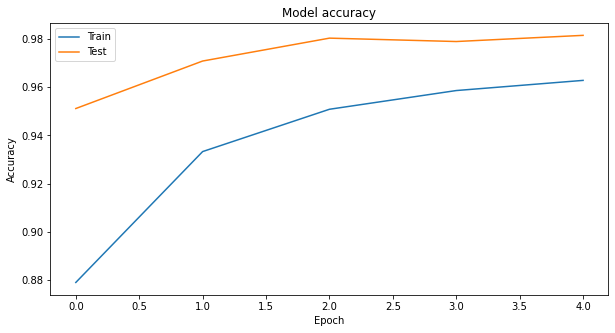

In [66]:
fig, ax1 = plt.subplots(figsize= (10, 5) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[[93628    20]
 [76164 17836]]
Confusion matrix


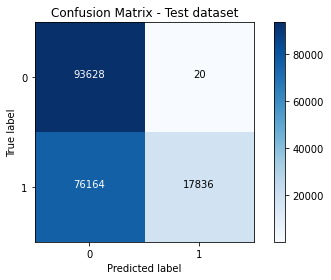

In [67]:
y_pred=cnn.predict(x_test)
cm = confusion_matrix(y_test, y_pred.round())

print(cm)
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

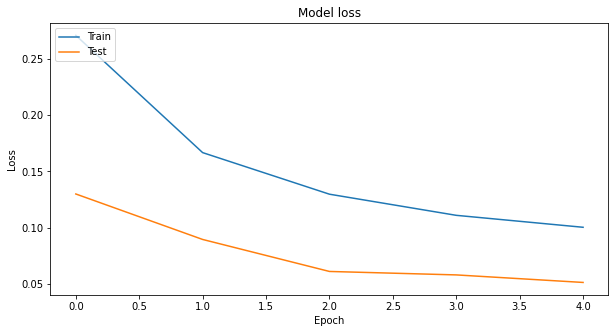

In [68]:
fig, ax1 = plt.subplots(figsize= (10, 5) )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("loss.png")
plt.show()

So we observe that in oversampling the results are good but these are extrapolated, it is due to large training set


Also we are getting good results on Test Set